### Training Loss Comparison

- Purpose: Compare how fast each strategy reduces DPO loss. Shows which strategy learns more efficiently.

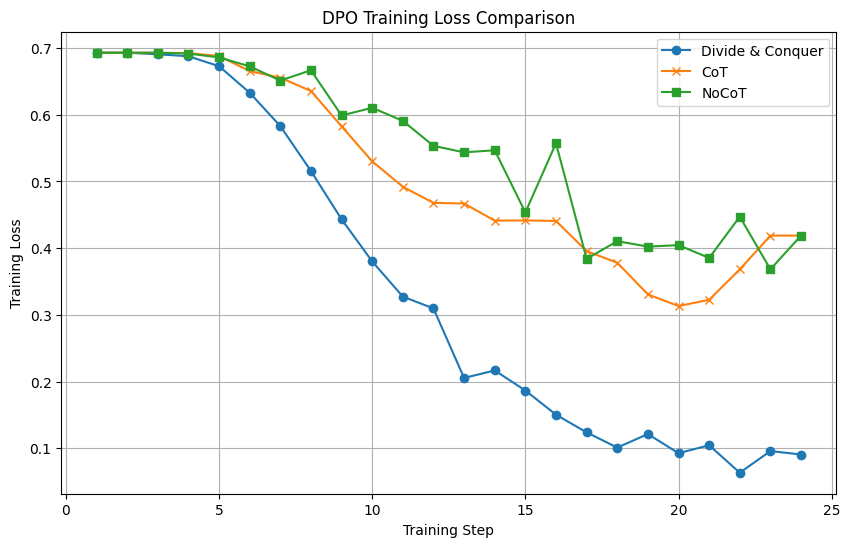

In [1]:
import matplotlib.pyplot as plt

steps = list(range(1, 25))

# Replace these lists with your actual loss values
loss_dc = [0.6931,0.6931,0.6908,0.6878,0.6729,0.6331,0.5831,0.5157,0.4433,0.3801,0.3273,0.3096,0.2053,0.2166,0.1865,0.1502,0.1237,0.1009,0.1212,0.0925,0.1044,0.0632,0.0957,0.0905]
loss_cot = [0.6931,0.6931,0.6931,0.6925,0.6882,0.6656,0.6557,0.6357,0.5827,0.5302,0.4921,0.4679,0.4669,0.4413,0.4416,0.4408,0.3956,0.3781,0.3307,0.3132,0.3225,0.3682,0.4189,0.4189]
loss_nocot = [0.6931,0.6931,0.6931,0.6918,0.6861,0.6727,0.6513,0.6668,0.5990,0.6105,0.5909,0.5534,0.5437,0.5468,0.4536,0.5573,0.3839,0.4105,0.4023,0.4045,0.3853,0.4472,0.3682,0.4189]

plt.figure(figsize=(10,6))
plt.plot(steps, loss_dc, marker='o', label='Divide & Conquer')
plt.plot(steps, loss_cot, marker='x', label='CoT')
plt.plot(steps, loss_nocot, marker='s', label='NoCoT')
plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.title("DPO Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

#### Insight:
- Look at slope and final value.
- Steeper slope + lower final loss → strategy learns faster and better.

### Reward Margin Trend

- Purpose: Visualize how preference signal improves over training steps.
- In DPO logs you have rewards/margins column.
- Positive margin → model favors chosen output.

In [2]:
# Example rewards/margins from your Divide & Conquer logs
margin_dc = [0.0,0.0,0.0048,0.0108,0.0409,0.1241,0.2341,0.3936,0.5846,0.7723,0.9607,1.0202,1.4902,1.4366,1.6178,1.8493,2.0435,2.2443,2.0849,2.3435,2.2925,2.7766,2.3703,2.3929]
margin_cot = [0.0,0.0,0.0,0.0012,0.0099,0.0560,0.0766,0.1191,0.2356,0.3588,0.4567,0.5165,0.5218,0.5925,0.5915,0.5981,0.7258,0.7914,0.9476,1.0007,0.9761,0.8245,0.6533,0.6533]
margin_nocot = [0.0,0.0,0.0,0.0026,0.0140,0.0414,0.0857,0.0533,0.1983,0.1736,0.2173,0.3041,0.3288,0.3217,0.5572,0.2931,0.7620,0.6930,0.7142,0.7198,0.7599,0.5883,0.8245,0.6533]

plt.figure(figsize=(10,6))
plt.plot(steps, margin_dc, marker='o', label='Divide & Conquer')
plt.plot(steps, margin_cot, marker='x', label='CoT')
plt.plot(steps, margin_nocot, marker='s', label='NoCoT')
plt.xlabel("Training Step")
plt.ylabel("Reward Margin")
plt.title("DPO Reward Margin Trend")
plt.legend()
plt.grid(True)
plt.show()


#### Insight:
- Higher margins → model prefers chosen outputs strongly.
- Divide & Conquer shows larger, consistent margins, indicating better preference learning.

### Log Probability Comparison (LogPs)

- Purpose: Compare how model confidence in chosen vs rejected outputs evolves.
- Columns: logps/chosen and logps/rejected.
- More negative → lower probability. Ideally, chosen logp should increase relative to rejected.

In [5]:
logp_chosen_dc = [-963.6, -936.1, -906.7, -948.3, -1059.9, -978.4, -1091.1, -1069.3, -1044.3, -1017.5]
logp_rejected_dc = [-507.7, -505.9, -480.6, -536.1, -579.5, -472.4, -546.9, -517.7, -590.0, -489.8]

plt.figure(figsize=(10,6))
plt.plot(range(1,11), logp_chosen_dc, marker='o', label='Chosen')
plt.plot(range(1,11), logp_rejected_dc, marker='x', label='Rejected')
plt.xlabel("Training Step")
plt.ylabel("Log Probability")
plt.title("Log Probability Evolution (Divide & Conquer)")
plt.legend()
plt.grid(True)
plt.show()
